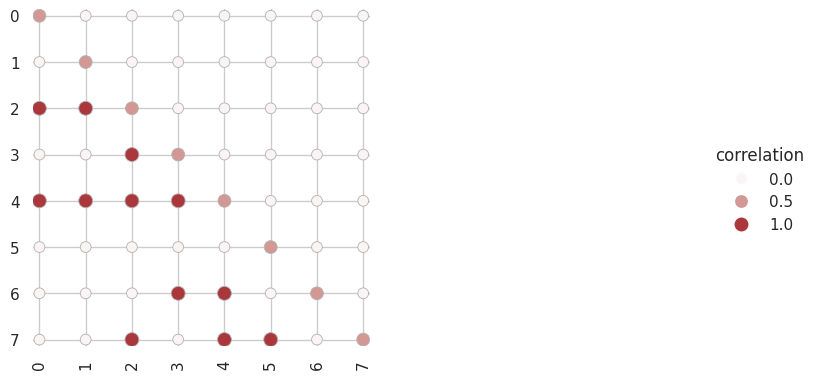

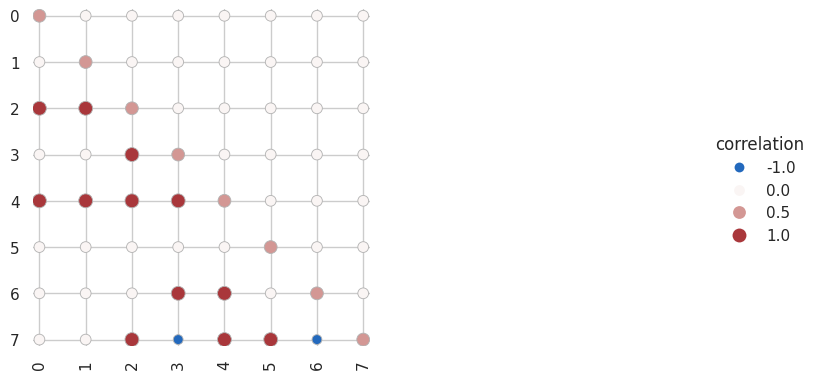

In [ ]:
# apply fill-in to BSR matrix example
# doing lower triangular matrix here
import numpy as np
from _plot_arr import *

# Example #1

# here's the original matrix
A = np.diag(0.5 * np.ones((8,)))
A[2, [0,1]] = 1.0
A[3,2] = 1.0
A[4,[0,1,2,3]] = 1.0 
A[6, [3,4]] = 1.0
A[7, [2, 4, 5]] = 1.0
plot_arr(A)

# then do fill-in for L (just NZ pattern not values / factorization)
L = A.copy()
L[7,3] = -1
L[7,6] = -1
plot_arr(L)


In [5]:
# TBD convert to rowPtr, colPtr format
A_rowPtr = [0, 1, 2, 5, 7, 12, 13, 16, 20]
A_colPtr = [0] + \
        [1] + \
        [0, 1, 2] + \
        [2, 3] + \
        [0, 1, 2, 3, 4] + \
        [5] + \
        [3, 4, 6] + \
        [2, 4, 5, 7]

# now fill-in (just write what additional entries we need)
# to get the fill-in efficiently I suspect we need the e-tree and it will make it very cheap to do so
# use sym matrix assumption and get data by columns of upper triangular part of A from Ch 4 of book
add_rowPtr = [0] * 7 + [2]
add_colPtr = [0]*7 + [3, 6]

# then we could parse back through and add them  to L (add the fill-in in)
L_rowPtr = [0, 1, 2, 5, 7, 12, 13, 16, 22]
L_colPtr = [0] + \
        [1] + \
        [0, 1, 2] + \
        [2, 3] + \
        [0, 1, 2, 3, 4] + \
        [5] + \
        [3, 4, 6] + \
        [2, 3, 4, 5, 6, 7]

# first significant fill-in check would be (if we went by row):
# is (3,1) NZ?
# one way to do it would cost O(N^4) or something crazy
# etree makes it cost O(N*M^2) where M is v. small and dim of etree branches?

ancestor=[4, 4, 7, 6, 7, 7, 7, -1]
parent=[2, 2, 3, 4, 6, 7, 7, -1]


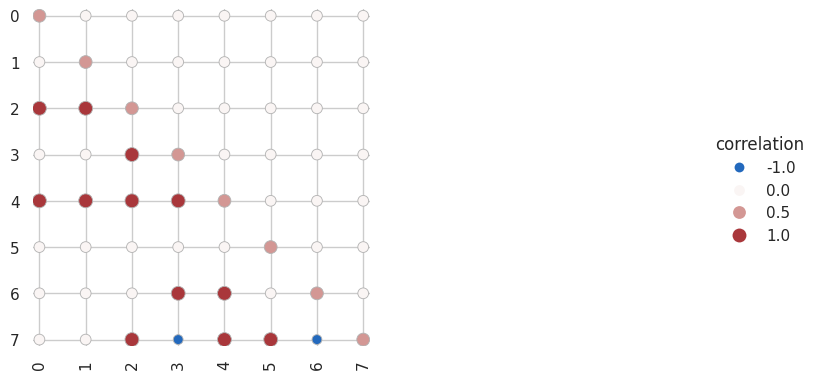

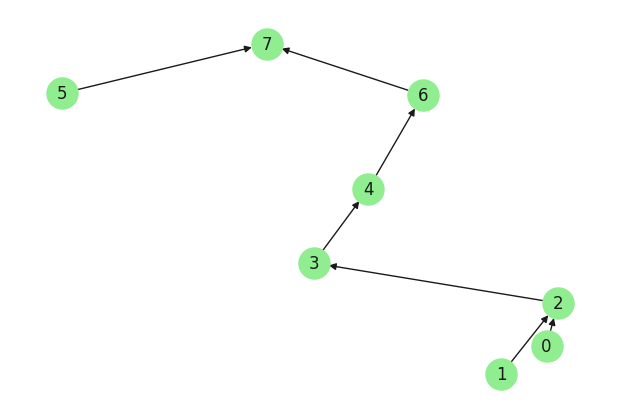

In [18]:
# let's try making the etree for this sym matrix A
# I've stored lower triangular here in row format before
# so switch to column format with upper triangular
Au_colPtr = [0, 1, 2, 5, 7, 12, 13, 16, 20]
Au_rowPtr = [0] + \
        [1] + \
        [0, 1, 2] + \
        [2, 3] + \
        [0, 1, 2, 3, 4] + \
        [5] + \
        [3, 4, 6] + \
        [2, 4, 5, 7]

N = 8
ancestor = [-1] * N
parent = [-1] * N

for k in range(N):
    parent[k] = -1
    ancestor[k] = -1
    for p in range(Au_colPtr[k], Au_colPtr[k+1]):
        i = Au_rowPtr[p]
        # print(f"(i,k)=({i},{k})")
        while (i != -1 and i < k): # traverse from i to k
            inext = ancestor[i]
            ancestor[i] = k
            # print(f"{inext=} {ancestor[i]=}")
            if (inext == -1): # no ancestor 
                # print(f"{i=}")
                parent[i] = k
            i = inext
print(f"{ancestor=}")
print(f"{parent=}")

# plot matrix again
plot_arr(L)

# plot the elimination tree
import networkx as nx
plt.figure(figsize=(6,4))
G = nx.DiGraph()
G.add_nodes_from([str(i) for i in range(8)])
for i in range(7):
    G.add_edge(str(i), str(parent[i]))
nx.draw(G, pos = None, ax = None, with_labels = True,font_size = 12, node_size = 500, node_color = 'lightgreen')

In [ ]:
# # now how to use the elimination tree to compute the fill-in nonzeros efficiently?
# # assume sparse matrix and originally CSR format but we can pretend it is CSC
# fillU_colPtr = [0]
# fillU_rowPtr = []

# for col_j in range(8): # loop over each column
#     parent_k = 0
#     while (parent_k != -1): # go through parents of etree
#         parent_k = parent[col_j]
#         # now check if there is some i such that i->j->k in etree
#         # what is best way to do this?
#         # go through columns and check if has j&k NZ in it? (seems O(N^2) with this)
#         # TBD on this

In [ ]:
# postorder a tree (4.3)
# identical to cs_post
post = [-1] * N
head = [-1] * N
next = [-1] * N
stack = [-1] * N
for j in range(N):
    head[j] = -1
for j in range(N-1,-1,-1): # go through backwards
    if (parent[j] == -1): continue
    next[j] = head[parent[j]]
    head[parent[j]] = j
for j in range(N):
    if (parent[j] != -1): continue
    

